# 📊 Sales Performance Analysis

## Overview
This Jupyter Notebook provides insights into sales data using Python for data visualization and analytics. It includes:
- Revenue Analysis (Total, Monthly Trends, Category-wise)
- Customer Insights (Top Customers, Customer Retention Insights, Customer Segmentation Insights)

## Tools Used:
- **Python (pandas, matplotlib, seaborn)**
- **PostgreSQL (data extraction & transformation)**
- **Tableau (interactive dashboard - link included)**

---



## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Sales_Performance_Data.csv")
df['Date'] = pd.to_datetime(df['Date'])  # Convert date column

# Preview Data
df.head()


,Order_ID,Date,Customer_ID,Product,Category,Revenue,Quantity
0,1001,2024-01-01,10052,Monitor,Electronics,362.52,2
1,1002,2024-01-02,10093,Monitor,Electronics,1703.54,2
2,1003,2024-01-03,10015,Monitor,Accessories,777.40,1
3,1004,2024-01-04,10072,Laptop,Accessories,535.73,4
4,1005,2024-01-05,10061,Laptop,Accessories,273.40,1


## 1️⃣ Revenue Analysis

/var/folders/kl/xc4gkdkd02z3mnjnpks9jv7r0000gp/T/ipykernel_32202/1582379239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")


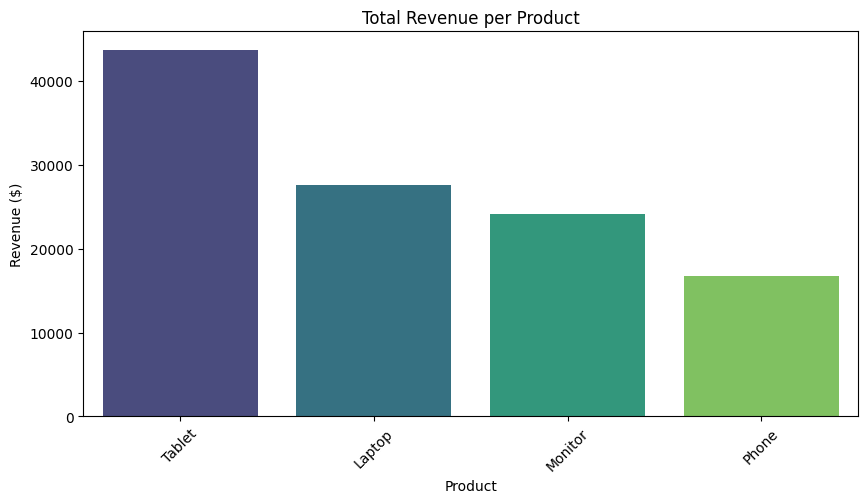

In [2]:
# Total Revenue Per Product
product_sales = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")
plt.title("Total Revenue per Product")
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.show()


### 2️⃣ Monthly Sales Trend

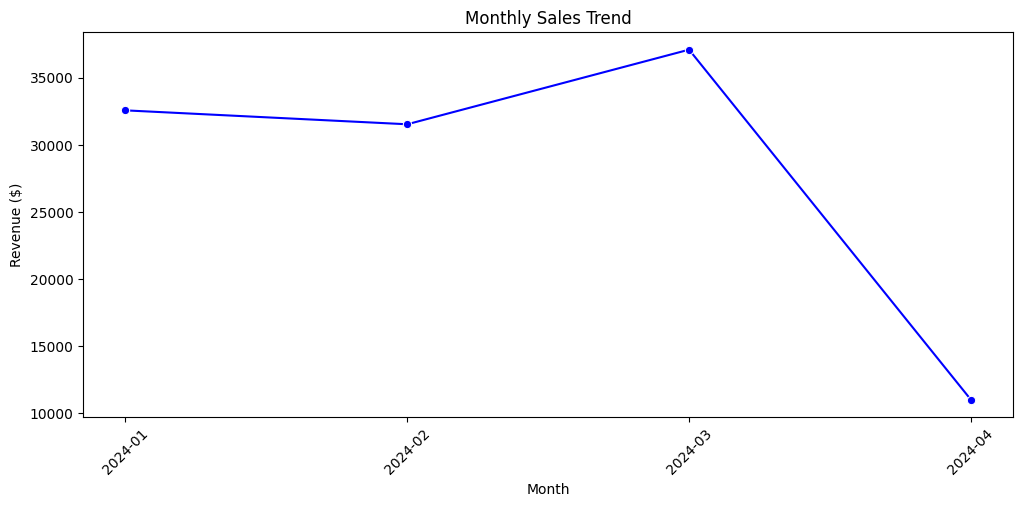

In [3]:
# Aggregate Monthly Sales
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.show()


### 3️⃣ Top 5 Customers by Revenue

/var/folders/kl/xc4gkdkd02z3mnjnpks9jv7r0000gp/T/ipykernel_32202/568994495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="coolwarm")


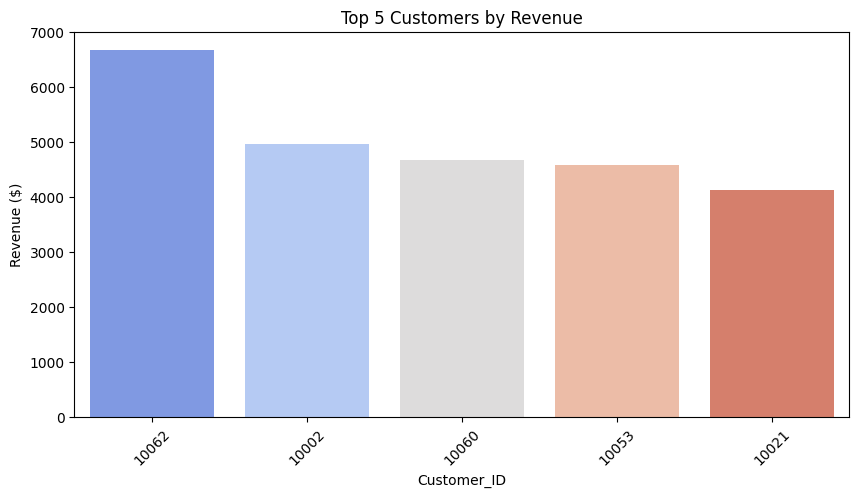

In [4]:
top_customers = df.groupby("Customer_ID")["Revenue"].sum().nlargest(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="coolwarm")
plt.title("Top 5 Customers by Revenue")
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.show()


###  4️⃣ Sales Contribution by Category

/var/folders/kl/xc4gkdkd02z3mnjnpks9jv7r0000gp/T/ipykernel_32202/201377656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")


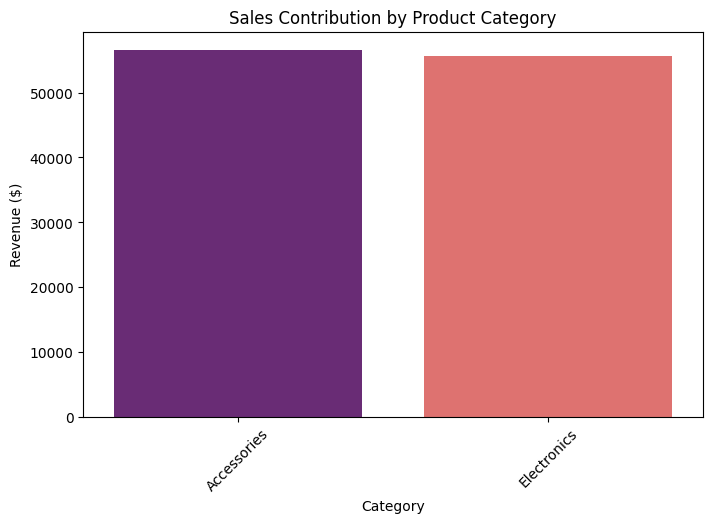

In [7]:
category_sales = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title("Sales Contribution by Product Category")
plt.xticks(rotation=45)
plt.ylabel("Revenue ($)")
plt.show()


### 5️⃣ Customer Retention Insights

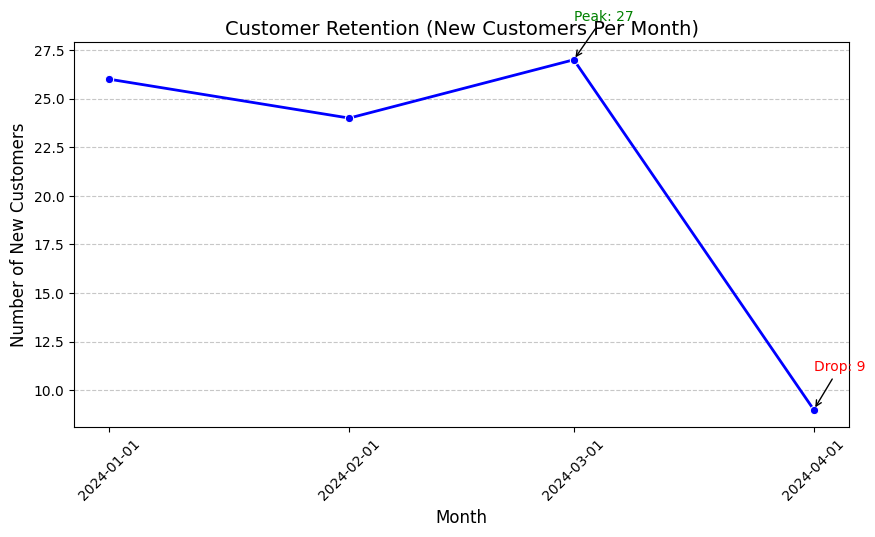

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the query result into a DataFrame (Replace with actual CSV file if exporting)
customer_retention_data = pd.DataFrame({
    'Order_Month': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01'],
    'New_Customers': [26, 24, 27, 9]
})

# Convert Order_Month to datetime format
customer_retention_data["Order_Month"] = pd.to_datetime(customer_retention_data["Order_Month"])

# Create a line plot
plt.figure(figsize=(10,5))
sns.lineplot(x=customer_retention_data["Order_Month"], 
             y=customer_retention_data["New_Customers"], 
             marker="o", color="blue", linewidth=2)

# Customize the chart
plt.title("Customer Retention (New Customers Per Month)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of New Customers", fontsize=12)
plt.xticks(customer_retention_data["Order_Month"].dt.strftime('%Y-%m'), rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight Peak & Lowest Point
max_value = customer_retention_data["New_Customers"].max()
min_value = customer_retention_data["New_Customers"].min()

max_month = customer_retention_data.loc[customer_retention_data["New_Customers"] == max_value, "Order_Month"].values[0]
min_month = customer_retention_data.loc[customer_retention_data["New_Customers"] == min_value, "Order_Month"].values[0]

plt.annotate(f"Peak: {max_value}", xy=(max_month, max_value), xytext=(max_month, max_value + 2),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color="green")

plt.annotate(f"Drop: {min_value}", xy=(min_month, min_value), xytext=(min_month, min_value + 2),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color="red")

# Show the plot
plt.show()


### 6️⃣ Customer Segmentation Insights

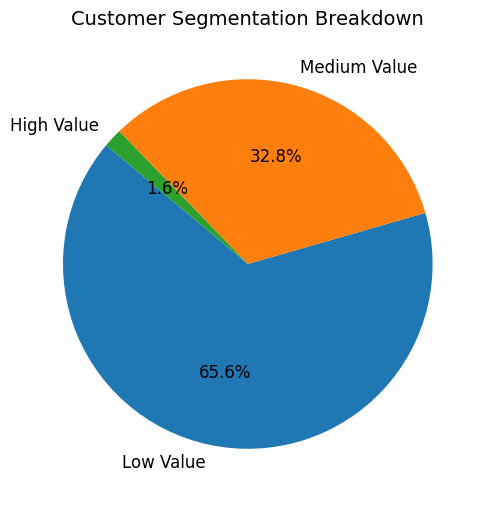

In [10]:
# Load Customer Segmentation Data
customer_segmentation_data = pd.read_csv("customer_segmentation.csv")

# Count Customers in Each Segment
segment_counts = customer_segmentation_data["customer_segment"].value_counts()

# Define Colors for Segments
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct="%1.1f%%", colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title("Customer Segmentation Breakdown", fontsize=14)
plt.show()